# Problem Statement


Recommendation Engines are the much needed manifestations of the desired
Predictability of User Activity. Recommendation Engines move one step
further and not only give information but put forth strategies to further increase users
interaction with the platform. In today’s world OTT platform and Streaming
Services have taken up a big chunk in the
Retail and Entertainment industry.
Organizations like Netflix, Amazon etc.
analyse User Activity Pattern’s and suggest
products that better suit the user needs and
choices. For the purpose of this Project we will be
creating one such Recommendation Engine
from the ground up, where every single user,
based on there area of interest and ratings,
would be recommended a list of movies that
are best suited for them.

#### Data Collection

# Dataset Information

1.
ID Contains the separate keys for
customer and movies.

2.
Rating A section contains the user
ratings for all the movies.

3.
Genre Highlights the category of the
movie.

4.
Movie Name Name of the movie with
respect to the movie id.

# Objective

1.
Find out the list of most popular and liked genre

2.
Create Model that finds the best suited Movie for one
user in every genre.

3.
Find what Genre Movies have received the best and
worst ratings based on User Rating.

# Data Preprocessing


In [6]:
#importing libararies that requires to solve this problems in in jupyter notebook

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
#upload of dataset in the notebook using the pandas and its a text file, so we have used 'usecols' to retrieve only needed
#dataset such as customer id and ratings.

In [9]:
df=pd.read_csv('/content/drive/MyDrive/combined_data_1.txt', names = ['Cust_Id', 'Rating'], usecols= [1,0], header= None)

In [10]:
df

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [11]:
#first five rows of dataset
df.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [12]:
#last five rows of the dataset
df.tail()

,Cust_Id,Rating
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0
24058262,1704416,3.0


In [13]:
#finding out total nan values so that it can help to calculate unique custoemr id
df.isnull().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [14]:
# total no. of unique customers in the datset giving reviews
cust_count=df['Cust_Id'].nunique()
cust_count

475257

In [15]:
#total no. of ratings in dataset
df.Rating.count()

24053764

In [16]:
#total rating count excluding nan values
rating_count=df.Cust_Id.count()-cust_count
rating_count

23583006

In [17]:
movie_count= df.isnull().sum()
movie_count=movie_count['Rating']
movie_count

4499

In [18]:
#types of the dataset can be seen as object and float64
df.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [19]:
#shape of the dataset
df.shape

(24058263, 2)

In [20]:
#frequency dist. of movies based on rating as 1, 2 , 3, 4 , 5

In [21]:
df.Rating.unique()

array([nan,  3.,  5.,  4.,  2.,  1.])

In [22]:
#no. of star ratings
stars= df.groupby('Rating')['Rating'].agg(['count'])

In [23]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [24]:
stars['count']

Rating
1.0    1118186
2.0    2439073
3.0    6904181
4.0    8085741
5.0    5506583
Name: count, dtype: int64

In [25]:
#plotting the graph of cutomers and ratings using bar horizontal chart type

Text(0.5, 1.0, 'Total movies: 4499, Total customers: 475257, Totak ratings: 23583006')

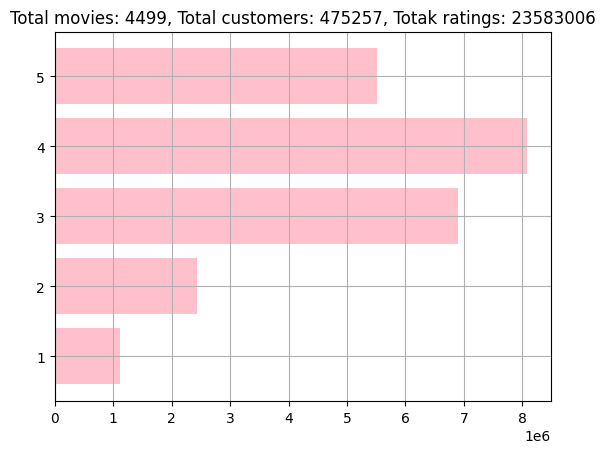

In [26]:
plt.figsize=(10,10)
plt.barh(stars.index, stars['count'], color= 'pink')
plt.grid(True)
plt.title(f'Total movies: {movie_count}, Total customers: {cust_count}, Totak ratings: {rating_count}' )

As per the given inference, we can say that most of the customers had given 4 star rating and then 3 star ratings.

In [27]:
#next stpe will be the finding out the nan values from rating column that will help to index it out for customer rating count

In [28]:
nan_value= pd.DataFrame(pd.isnull(df.Rating))

In [29]:
nan_value

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [30]:
#now to take only true values that has customer id

In [31]:
df_nan_value= nan_value[nan_value['Rating']==True]
df_nan_value

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


so we actually got the customer count again with the nan values as true

In [32]:
#updated column with index values

In [33]:
df_nan_value=df_nan_value.reset_index()
df_nan_value

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [34]:
df_nan_value.shape

(4499, 2)

In [35]:
df_nan_value.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [36]:
df_nan_value.tail()

,index,Rating
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True
4498,24057834,True


In [37]:
x=(df_nan_value.index[1:], df_nan_value.index[:-1])
x

(RangeIndex(start=1, stop=4499, step=1),
 RangeIndex(start=0, stop=4498, step=1))

In [38]:
df_nan_value

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [39]:
#performing smaller steps to understand and get the final values

In [40]:
len(df)

24058263

In [41]:
(df_nan_value.iloc[-1,0])-1

24057833

In [42]:
len(df)-df_nan_value.iloc[-1,0]

429

In [43]:
#now we will create a numpy array that will contain 1 from values 0 to 547, 2 from 549 to 693 and so on
movie_np=[]
movie_id=1
for i, j in zip(df_nan_value['index'][1:], df_nan_value['index'][:-1]):
    temp=np.full((1, i-j-1), movie_id)
    movie_np=np.append(movie_np, temp)
    movie_id+=1

#using numpy I will account for last record and corresponding length where movie id will be 4499
last_record=np.full((1, len(df)-df_nan_value.iloc[-1,0]-1), movie_id)
movie_np=np.append(movie_np, last_record)

In [44]:
movie_np.shape

(24053764,)

In [45]:
#for example
temp=np.full((1, 548), 2)
temp

array([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [46]:
#now removing null values from rating to get the actual count of the ratings given by the customers

df=df[pd.notnull(df['Rating'])]
df['Movie_Id']= movie_np.astype(int)
df['Cust_Id']=df['Cust_Id'].astype(int)

In [47]:
#we have found out the final dataset of custid, rating and movieid to the all the movies and accrodingly their ratings

In [48]:
df

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [49]:
df_movie_summary= df.groupby('Movie_Id')['Rating'].count()
df_movie_summary

Movie_Id
1        547
2        145
3       2012
4        142
5       1140
        ... 
4495     614
4496    9519
4497     714
4498     269
4499     428
Name: Rating, Length: 4499, dtype: int64

In [50]:
df_cust_summary= df.groupby('Cust_Id')['Rating'].count()
df_cust_summary

Cust_Id
6          153
7          195
8           21
10          49
25           4
          ... 
2649404     12
2649409     10
2649421      3
2649426     74
2649429     62
Name: Rating, Length: 470758, dtype: int64

In [51]:
t=round(df_movie_summary.quantile(0.70),0)
t

1799.0

In [52]:
s=round(df_cust_summary.quantile(0.70),0)
s

52.0

In [53]:
drop_cust_list=df_cust_summary[df_cust_summary<s].index
drop_cust_list

Int64Index([      8,      10,      25,      33,      42,      59,      83,
                 87,      94,     116,
            ...
            2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401,
            2649404, 2649409, 2649421],
           dtype='int64', name='Cust_Id', length=327300)

In [54]:
drop_movie_list=df_movie_summary[df_movie_summary<t].index
drop_movie_list

Int64Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='Movie_Id', length=3149)

In [55]:
df.shape

(24053764, 3)

In [56]:
df['Movie_Id'].isin(drop_movie_list).count()

24053764

In [57]:
df['Cust_Id'].isin(drop_cust_list).count()

24053764

In [58]:
df=df[~df['Movie_Id'].isin(drop_movie_list)]
df=df[~df['Cust_Id'].isin(drop_cust_list)]
df

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056841,520675,3.0,4496
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056845,1559566,3.0,4496


#model buidling SVD analysis


In [59]:
#uploding the movies title file to check the popular movieID rated by customers based on year and name
df_title=pd.read_csv('/content/drive/MyDrive/movie_titles.csv', encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name'])

In [60]:
#evaluation of the movies dataset
df_title.head(10)

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
6,7,1992.0,8 Man
7,8,2004.0,What the #$*! Do We Know!?
8,9,1991.0,Class of Nuke 'Em High 2
9,10,2001.0,Fighter


In [61]:
df_title.tail(10)

,Movie_Id,Year,Name
17760,17761,2003.0,Levity
17761,17762,1997.0,Gattaca
17762,17763,1978.0,Interiors
17763,17764,1998.0,Shakespeare in Love
17764,17765,1969.0,Godzilla's Revenge
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company
17769,17770,2003.0,Alien Hunter


In [62]:
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [63]:
df_title.iloc[:4499,:]

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
4494,4495,2002.0,Clifford: Happy Birthday Clifford / Puppy Love
4495,4496,1993.0,Farewell My Concubine
4496,4497,1990.0,Texasville
4497,4498,2000.0,Gonin


#installation of surprise package for importing SVD libararies and others to read the data and tranform into the proper format

In [64]:
!pip install scikit-surprise

In [65]:
#import of libararies from surprise
import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [66]:
reader= Reader()

In [67]:
data=Dataset.load_from_df(df[['Cust_Id','Movie_Id','Rating']][:100000], reader)

In [68]:
data

In [69]:
model_svd=SVD()

#hyper parameter tuning

In [70]:
#cross validating data to find out rmse and mae under the trail of 3
cross_validate(model_svd, data, measures= ['RMSE', 'MAE'], cv=3)

{'test_rmse': array([0.99424773, 0.99502399, 1.00209167]),
 'test_mae': array([0.79885455, 0.80359512, 0.79554299]),
 'fit_time': (2.8189430236816406, 1.757211446762085, 1.4198696613311768),
 'test_time': (0.43334364891052246, 0.3592092990875244, 0.39612340927124023)}

In [71]:
df.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [75]:
#1.Find out the list of most popular and liked genre
#2. Create Model that finds the best suited Movie for one user in every genre.
#3. Find what Genre Movies have received the best and worst ratings based on User Rating.

#Model implementation

In [88]:
#checking a random customer as a example giving rating 5 and how many movies
df_512536= df[(df['Cust_Id']==512536) & (df['Rating']==5)]
df_512536.shape

(25, 3)

In [81]:
#we will make a copy of movies dataset so that not to manipulate actual data for model evaluation
user_512536=df_title.copy()
user_512536

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [82]:
user_512536=user_512536.reset_index()
user_512536

,index,Movie_Id,Year,Name
0,0,1,2003.0,Dinosaur Planet
1,1,2,2004.0,Isle of Man TT 2004 Review
2,2,3,1997.0,Character
3,3,4,1994.0,Paula Abdul's Get Up & Dance
4,4,5,2004.0,The Rise and Fall of ECW
...,...,...,...,...
17765,17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17766,17767,2004.0,Fidel Castro: American Experience
17767,17767,17768,2000.0,Epoch
17768,17768,17769,2003.0,The Company


In [83]:
user_512536=user_512536[~user_512536['Movie_Id'].isin(drop_movie_list)]
user_512536

,index,Movie_Id,Year,Name
2,2,3,1997.0,Character
7,7,8,2004.0,What the #$*! Do We Know!?
15,15,16,1996.0,Screamers
16,16,17,2005.0,7 Seconds
17,17,18,1994.0,Immortal Beloved
...,...,...,...,...
17765,17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17766,17767,2004.0,Fidel Castro: American Experience
17767,17767,17768,2000.0,Epoch
17768,17768,17769,2003.0,The Company


In [85]:
user_512536['Estimate_Score']=user_512536['Movie_Id'].apply(lambda x: model_svd.predict(512536, x).est)


In [86]:
user_512536

,index,Movie_Id,Year,Name,Estimate_Score
2,2,3,1997.0,Character,3.814562
7,7,8,2004.0,What the #$*! Do We Know!?,3.702004
15,15,16,1996.0,Screamers,3.476993
16,16,17,2005.0,7 Seconds,2.832854
17,17,18,1994.0,Immortal Beloved,3.927524
...,...,...,...,...,...
17765,17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.653211
17766,17766,17767,2004.0,Fidel Castro: American Experience,3.653211
17767,17767,17768,2000.0,Epoch,3.653211
17768,17768,17769,2003.0,The Company,3.653211


In [87]:
user_512536=user_512536.sort_values('Estimate_Score',ascending=False)
print(user_512536)

       index  Movie_Id    Year                        Name  Estimate_Score
17        17        18  1994.0            Immortal Beloved        3.927524
27        27        28  2002.0             Lilo and Stitch        3.909477
2          2         3  1997.0                   Character        3.814562
7          7         8  2004.0  What the #$*! Do We Know!?        3.702004
12895  12895     12896  1994.0       Bullets Over Broadway        3.653211
...      ...       ...     ...                         ...             ...
17769  17769     17770  2003.0                Alien Hunter        3.653211
29        29        30  2003.0      Something's Gotta Give        3.561243
15        15        16  1996.0                   Screamers        3.476993
25        25        26  2004.0             Never Die Alone        3.105145
16        16        17  2005.0                   7 Seconds        2.832854

[14621 rows x 5 columns]


In [ ]:
#1.Find out the list of most popular and liked genre

In [91]:
df.groupby('Rating')['Movie_Id']

In [98]:
best=df[df['Rating']==5]
best

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
699,44937,5.0,3
714,66414,5.0,3
715,2519847,5.0,3
721,2158448,5.0,3
...,...,...,...
24056811,2087152,5.0,4496
24056824,2082805,5.0,4496
24056837,196584,5.0,4496
24056840,823628,5.0,4496


In [99]:
best.Movie_Id.nunique()

1350

In [ ]:
#3. Find what Genre Movies have received the best and worst ratings based on User Rating.

In [100]:
best.groupby('Rating')['Movie_Id'].count()

Rating
5.0    3769803
Name: Movie_Id, dtype: int64

In [102]:
worst=df[df['Rating']==1]
worst

,Cust_Id,Rating,Movie_Id
701,439011,1.0,3
737,2143489,1.0,3
746,1854303,1.0,3
758,2173816,1.0,3
779,52540,1.0,3
...,...,...,...
24056574,172618,1.0,4496
24056612,834896,1.0,4496
24056763,2634967,1.0,4496
24056795,559886,1.0,4496


In [112]:
worst['Movie_Id'].nunique()

1350